# Listening tests, speech and music

What would the fun in designing a filter be if we didn't hear it in action?

Speech clips are taken from EUSTACE ([1]). The listening tests are repeated with a 1st and 12th order WFIR, since the original paper that prompted this project ([2]) uses a 12th order Warped Linear Prediction filter.

In [2]:
import numpy, scipy, scipy.signal


def wfir(x: numpy.ndarray, fs: float, order: int) -> numpy.ndarray:
    def bark_warp_coef(fs):
        return 1.0674 * numpy.sqrt((2.0 / numpy.pi) * numpy.arctan(0.06583 * fs / 1000.0)) - 0.1916

    a = bark_warp_coef(fs)

    B = [-a.conjugate(), 1]
    A = [1, -a]

    ys = [0] * order

    ys[0] = scipy.signal.lfilter(B, A, x)
    for i in range(1, len(ys)):
        ys[i] = scipy.signal.lfilter(B, A, ys[i - 1])
        
    return ys[-1]

## Speech

### Female speech

In [9]:
from IPython.display import Audio
import scipy.io, scipy.io.wavfile


female_speech_clip = './speech_f.wav'
fs, x = scipy.io.wavfile.read(female_speech_clip)              
Audio(x, rate=fs)

In [10]:
y1 = wfir(x, fs, 1)
Audio(y1, rate=fs)

In [33]:
y12 = wfir(x, fs, 12)
Audio(y12, rate=fs)

In [34]:
print(numpy.max(x))
print(numpy.max(y1))
print(numpy.max(y12))

17860
18113.449579121116
18220.60965899921


In [13]:
r1 = x - y1 # residual signal r[n] = x[n] - D(z)x[n]
Audio(r1, rate=fs)

In [35]:
r12 = x - y12 # residual signal r[n] = x[n] - D(z)x[n]
Audio(r12, rate=fs)

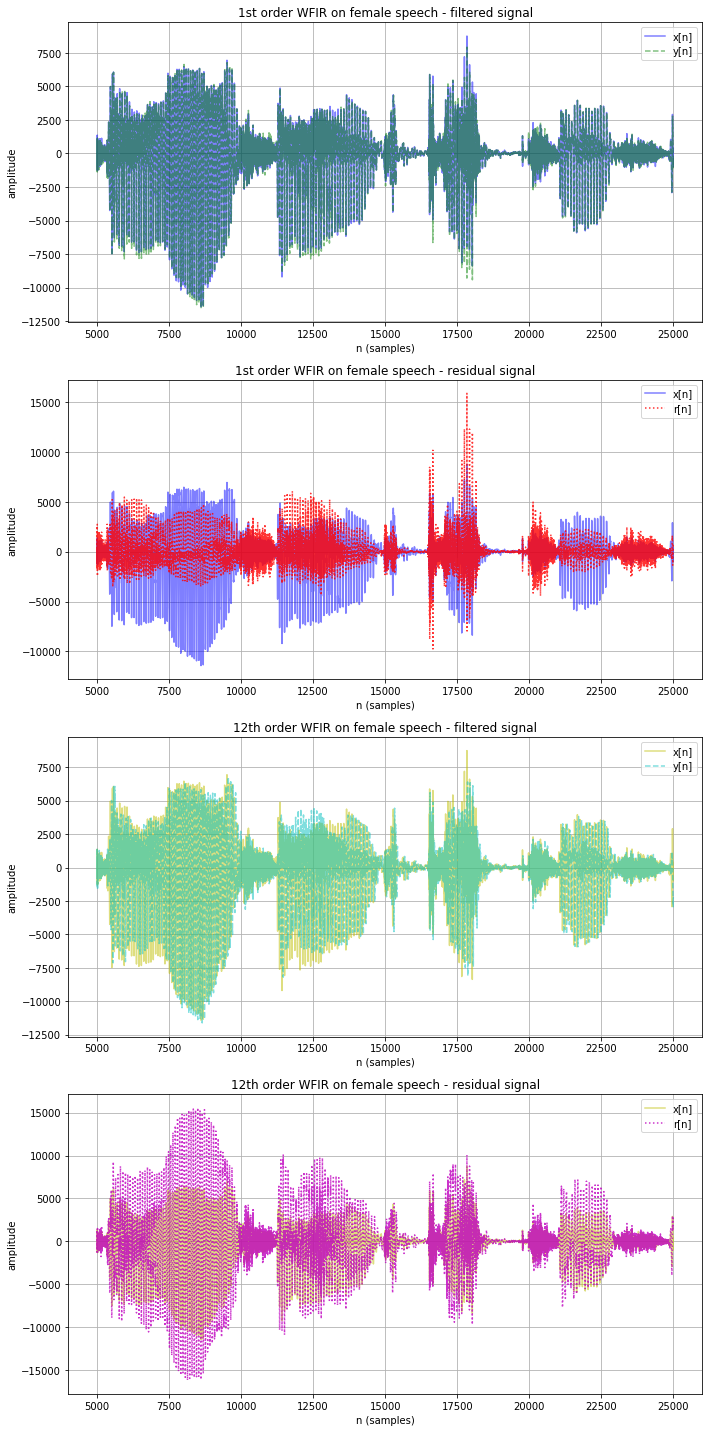

In [38]:
import matplotlib.pyplot as plt

#samples = numpy.arange(max(max(len(x), len(y1)), len(r1)))
l = 5000
r = 25000
samples = numpy.arange(r)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 20))

ax1.plot(samples[l:r], x[l:r], 'b', alpha=0.5, label='x[n]')
ax1.set_title(r'1st order WFIR on female speech - filtered signal')
ax1.set_xlabel('n (samples)')
ax1.set_ylabel('amplitude')
ax1.plot(samples[l:r], y1[l:r], 'g', linestyle='--', alpha=0.5, label='y[n]')
ax1.grid()
ax1.legend(loc='upper right')

ax2.plot(samples[l:r], x[l:r], 'b', alpha=0.5, label='x[n]')
ax2.set_title(r'1st order WFIR on female speech - residual signal')
ax2.plot(samples[l:r], r1[l:r], 'r', linestyle=':', alpha=0.8, label='r[n]')
ax2.set_xlabel('n (samples)')
ax2.set_ylabel('amplitude')
ax2.grid()
ax2.legend(loc='upper right')

ax3.plot(samples[l:r], x[l:r], 'y', alpha=0.5, label='x[n]')
ax3.set_title(r'12th order WFIR on female speech - filtered signal')
ax3.set_xlabel('n (samples)')
ax3.set_ylabel('amplitude')
ax3.plot(samples[l:r], y12[l:r], 'c', linestyle='--', alpha=0.5, label='y[n]')
ax3.grid()
ax3.legend(loc='upper right')

ax4.plot(samples[l:r], x[l:r], 'y', alpha=0.5, label='x[n]')
ax4.set_title(r'12th order WFIR on female speech - residual signal')
ax4.plot(samples[l:r], r12[l:r], 'm', linestyle=':', alpha=0.8, label='r[n]')
ax4.set_xlabel('n (samples)')
ax4.set_ylabel('amplitude')
ax4.grid()
ax4.legend(loc='upper right')

plt.axis('tight')
fig.tight_layout()
plt.show()

## References

1. White, L.S. and King, S. 2003. The EUSTACE speech corpus (http://www.cstr.ed.ac.uk/projects/eustace). Centre for Speech Technology Research, University of Edinburgh.

2. T. Tolonen and M. Karjalainen, "A computationally efficient multipitch analysis model," in IEEE Transactions on Speech and Audio Processing, vol. 8, no. 6, pp. 708-716, Nov. 2000. doi: 10.1109/89.876309